## Project Motivation
    For this project, I was interestested in using Stack Overflow data from 2017 to better understand:

    What are the most important things to look when you are applying for a job?
    What are the essential skills that recruiters are looking for?
    Outside of formal education, What other education types gave an edge to developers?
    What do developers prefer, Tabs or spaces?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

c:\users\kalya\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\users\kalya\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\kalya\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\kalya\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\kalya\appdata\local\programs\python\python37\lib\im

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.shape

(51392, 154)

In [3]:
#olumns which have no missing values 
df.columns[df.isnull().mean() == 0]

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

In [4]:
#columns which have more nulls
df.columns[df.isnull().mean() > 0.75]

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp',
       'ExpectedSalary'],
      dtype='object')

In [11]:
df[['ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive']].isnull().apply(lambda x: all(x), axis=1).sum()

# we dont have enough data to answer the questions related to exCoder.

50442

### Asses Job Industry

    Survey Question - When you're assessing potential jobs to apply to, how important are each of the following to you? 
    Job Industry
    Job Role
    Job Experience in the description
    Job Deprtment
    Technologies in Job
    How Projects are managed at company
    Job Compensation
    Office Environment
    Job Commute
    Work from Home/Remote opportunity/
    Company Leaders
    Opportunity for Proffesional Development
    Diversity of the company
    Company's Product
    Financial perfomance of the comapny
    
    "What are the most important things to look when you are applying for a job?"

In [20]:
df.AssessJobCommute.value_counts()

Important               8316
Very important          6952
Somewhat important      5116
Not very important      1313
Not at all important     276
Name: AssessJobCommute, dtype: int64

In [381]:
labels_JobAssess = ['Job Industry',
'Job Role',
'Job Experience in the description',
'Job Deprtment',
'Technologies in Job',
'How Projects are managed at company',
'Job Compensation',
'Office Environment',
'Job Commute',
'Work from Home/Remote opportunity',
'Company Leaders',
'Opportunity for Proffesional Development',
'Diversity of the company',
"Company's Product",
'Financial perfomance of the comapny']

In [735]:
#to get the columns regarding Job Assess
Assess_cols = [] 
for col in df.columns:
    if 'AssessJob' in col:
        Assess_cols.append(col)

# to get the order for columns
def sort_cols(columns, important_level):
    '''
    Sorts the Job Assess columns in ascending order based on counts
    
    Arguments:
    List of Job Assess columns, Importance Level of columns(string)
    
    returns:
    An numpy array of Sorted Columns in ascending order based on the counts of Importance Level in each Job Assess column.
    
    '''
    imp_level_counts = pd.Series() #to store the counts of specified important level for each column
    
    for col in columns:
        imp_level_counts = imp_level_counts.append(
            df[col].value_counts()[df[col].value_counts().index == important_level])
    
    #to get the sorted column names convert our series to dataframe.
    df_order = imp_level_counts.reset_index() 
    df_order['index'] = columns
    df_order.columns = ['col','value']
    return df_order.sort_values(by = 'value', ascending = True)['col'].values

# best use case how to change the bar position and height to get the gap between them.

def plot_multiple_cols_bar(columns, important_level,title,labels,color = 'tab:blue'):
    '''
    Plots bar chart for Job Assess columns and their percentages.
    
    Arguments:
    List of Sorted Job Assess columns, Importance Level of columns(string),plot title,yticks labels, color 
    
    returns:
    None. Plots a Bar chart.
    '''
    plt.figure(figsize = (9,8))
    i = 0 #for increementing the position in bar plot
    
    for col in columns:
        ax = plt.subplot(111)
        y = (df[df[col] == important_level].shape[0] /df.shape[0]) * 100
        ax.barh(i, width = y,height = 0.6, color = color)
        ax.text(y + 0.5, i - 0.1, "{:.2f}".format(y) + '%', color='black', fontweight='bold')
        i += 0.8 #increementing bars positions
        
    ax.set_yticks(np.arange(0,len(columns) * 0.8,0.8)) #for setting the ticks based on column length
    ax.set_yticklabels(labels,fontsize = 12)
    ax.set_xlim(0,22)
    ax.get_xaxis().set_ticks([]) #to remove the xticks
    ax.set_title(title , fontsize = 24)
    plt.xlabel('Percentage of Developers marked as important',fontsize = 12)

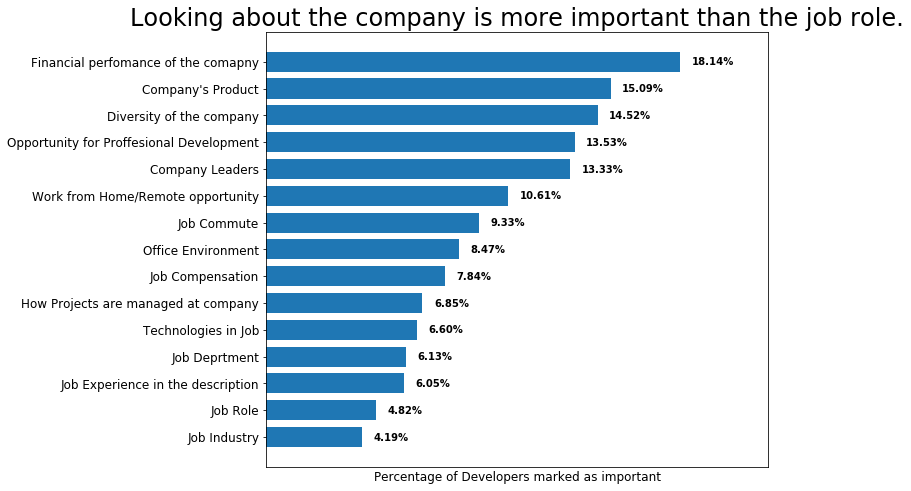

In [736]:
#bar plot for 'Very important' Level.
plot_multiple_cols_bar(list(sort_cols(Assess_cols,'Very important')), 'Very important',
                       "Looking about the company is more important than the job role.",
                      labels_JobAssess)

Categories which have more than 10% of respondents marked as important are all related to company like the company’s financial performance, product, diversity, and the opportunity for professional development. For job-specific related information job commute has high percentage of all, 9.33%. Job Role, Job Industry, experience, Department are at bottom. 

### Important Hiring Skill
    Survey Question - Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process?

    Algorithms
    Experience with the tools used by employer
    Communication
    Contributions to Open Source projects
    Experience with project management tools
    Previous companies worked at
    Previous job titles held
    Educational credentials
    Stackoverflow reputation
    Track record of Getting Things Done
    
    What are the important skills in the hiring process when recruiting software developers?

In [113]:
#get Important Hiring skills columns from data frame
Important_skill_cols = []
for col in df.columns:
    if col.startswith('ImportantHiring'):
        Important_skill_cols.append(col)

In [380]:
labels_skills = ['Algorithms',
'Experience with the tools used by employer',
'Communication',
'Contributions to Open Source projects',
'Experience with project management tools',
'Previous companies worked at',
'Previous job titles held',
'Educational credentials',
'Stackoverflow reputation',
'Track record of Getting Things Done']

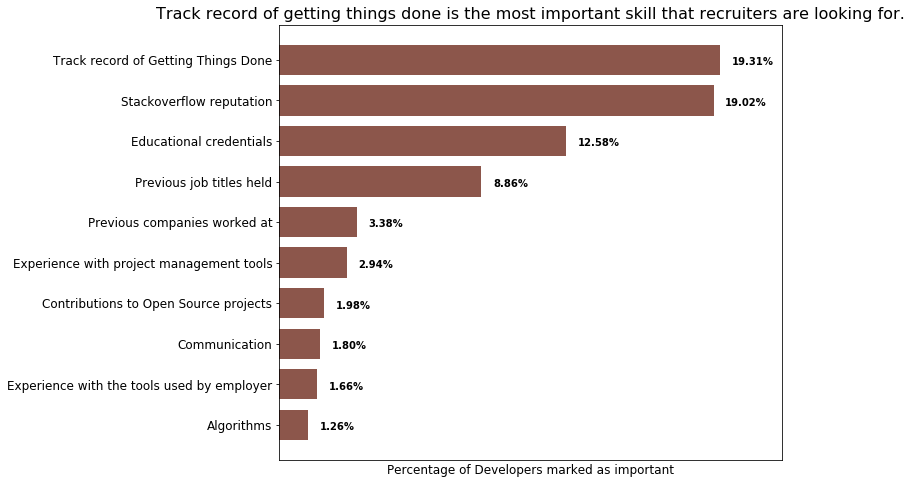

In [707]:
plot_multiple_cols_bar(list(sort_cols(Important_skill_cols,'Very important')), 'Very important',
                       "Track record of getting things done is the most important skill that recruiters are looking for.",
                       labels_skills,'tab:brown') #default color is blue

Here, we can notice the clusters in ordering.    
1. Accomplishments - Track record of getting things done, stackoverflow reputation, Educational credentials.
2. Previous work experience - Previous job titles held, previous companies worked at.
3. Management - Experience with project management tools, open source projects(which most people uses it to learn about the candiadate collobration skills), communication.
4. Technical skills - Experience with the tools used by employer, Algorithms.

### Tabs or spaces?

In [306]:
def group_developer(row):
    '''
    Combines 3 columns('WebDeveloperType','MobileDeveloperType','NonDeveloperType') to 1 column as DevoloperType_grouped
    
    Arguments: each row from the 3 columns.
    
    returns: returns a string of developer type.
    '''
    
    if type(row[0]) == str:
        return 'Web Developer'
    elif type(row[1]) == str:
        return 'Mobile Developer'
    elif type(row[2]) == str:
        return 'Non Developer'
    else:
        return 'NaN'
    
df['DeveloperType_grouped'] = df[['WebDeveloperType','MobileDeveloperType','NonDeveloperType']].apply(group_developer, axis = 1)
#learn these type of apply .. role of axis = 1

Text(0.5, 1.0, 'Tabs Vs Spaces')

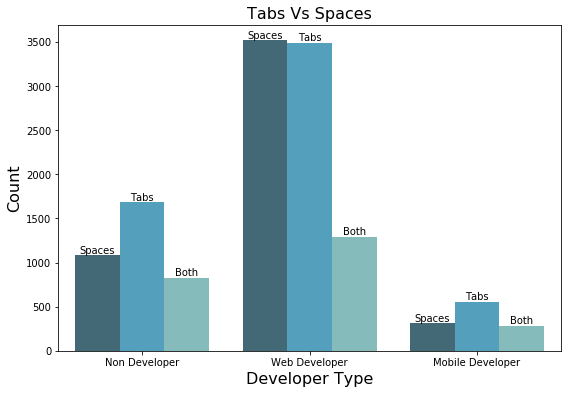

In [527]:
#for custom text
text = ['Spaces'] * 3 + ['Tabs'] * 3 + ['Both'] * 3

plt.figure(figsize = (9,6))
ax = sb.countplot(data = df[df['DeveloperType_grouped'] != 'NaN'], x = 'DeveloperType_grouped',
             hue = 'TabsSpaces',palette="GnBu_d")

for t,p in zip(text,ax.patches): 
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(t, (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.get_legend().remove() # to remove legend
plt.xlabel('Developer Type', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Tabs Vs Spaces',fontsize = 16);

In web developers, the proportion of people who prefer space and tab is almost the same, but with a slight difference, Spaces wins. In mobile developers and non-developers, Tabs wins.

### Other Education Types
    Survey Question - Outside of your formal schooling and education, which of the following have you done?
     
     'Bootcamp',
     'Coding competition',
     'Hackathon',
     'Industry certification',
     'On-the-job training',
     'Online course',
     'Open source contributions',
     'Part-time/evening course',
     'Self-taught'
     
     Outside of formal education, What other education types gave an edge to developers?

In [639]:
#dropping the rows with nulls in these particular columns because we include these in our linear regression model.
df_EducationTypes = df.dropna(subset = ['EducationTypes','Salary','DeveloperType']).copy()
df_EducationTypes.shape

(8874, 155)

In [640]:
df_EducationTypes.EducationTypes.head()

2     Self-taught; Coding competition; Hackathon; Op...
17    On-the-job training; Self-taught; Coding compe...
18                               Self-taught; Hackathon
22                                          Self-taught
34    Part-time/evening course; Self-taught; Coding ...
Name: EducationTypes, dtype: object

In [641]:
#to get unique EducationTtypes
def get_unique_types(column):
    '''
    gets unique items from the column specified
    
    arguments: 
    column name
    
    returns:
    set of unique types in that column
    '''
    List = []
    df_EducationTypes[column].apply(lambda x : x.split(';')).apply(lambda x : List.extend(x))
    return set([e.strip() for e in List]) #to remove the front spaces

In [642]:
#to get unique EducationTtypes
unique_EducationTypesList = get_unique_types('EducationTypes')
unique_EducationTypesList

{'Bootcamp',
 'Coding competition',
 'Hackathon',
 'Industry certification',
 'On-the-job training',
 'Online course',
 'Open source contributions',
 'Part-time/evening course',
 'Self-taught'}

In [643]:
#to get unique DeveloperTypes
unique_DeveloperTypesList = get_unique_types('DeveloperType')
unique_DeveloperTypesList

{'Data scientist',
 'Database administrator',
 'Desktop applications developer',
 'DevOps specialist',
 'Developer with a statistics or mathematics background',
 'Embedded applications/devices developer',
 'Graphic designer',
 'Graphics programming',
 'Machine learning specialist',
 'Mobile developer',
 'Other',
 'Quality assurance engineer',
 'Systems administrator',
 'Web developer'}

In [644]:
#creates binary columns for each unique category in the column
def create_cols(col_names,column):
    '''
    create binary columns for each unique items in that column
    
    Arguments:
    list of binary column names to be created, categorical column name 
    
    returns:
    None. creates columns in our existing data frame(df_EducationTypes)
    '''
    for col in col_names:
        df_EducationTypes[col] = df_EducationTypes[column].apply(lambda x : 1 if col in x else 0)

#create columns for unique Education types
create_cols(unique_EducationTypesList,'EducationTypes')

#create columns for unique Education types
create_cols(unique_DeveloperTypesList,'DeveloperType')
df_EducationTypes.shape

(8874, 178)

In [645]:
#create a numerical column for YearsCodedJob
df_EducationTypes['YearsCodedJob_num'] = df_EducationTypes.YearsCodedJob.fillna('Less than a year').apply(lambda x : float(x[:2].rstrip()) if x != 'Less than a year' else 0)

In [649]:
def linear_model(data,columns,formal_educ = None):
    '''
    filters the data based on formal education and runs linear regression on that data to fit the salary(y)
    
    Arguments:
    data, columns to regress in data, formal_education to filter the education level
    
    Returns:
    coefficients of each column
    '''
    
    if formal_educ:
        data = data[data.FormalEducation == formal_educ] #filters data based on formal education selected
    X = data[columns].values

    Y = data['Salary'].values.reshape(-1,1)

    scaler = StandardScaler()
    X_transformed = scaler.fit_transform(X)
    Y_transformed = scaler.fit_transform(Y)

    # linear model
    X2 = sm.add_constant(X_transformed)
    lm_model = sm.OLS(Y_transformed, X2)
    res = lm_model.fit()
    print(res.summary(xname = ['const'] + columns)) #to print the column names in summary output
    
    params = res.params[1:len(unique_EducationTypesList) + 1] #returns without constant coefficient
    
    return params

In [650]:
weights_bachelors_degree = linear_model(df_EducationTypes,list(unique_EducationTypesList) + list(unique_DeveloperTypesList) + ['YearsCodedJob_num'],
             "Bachelor's degree")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     72.63
Date:                Sun, 29 Mar 2020   Prob (F-statistic):          1.25e-296
Time:                        19:53:30   Log-Likelihood:                -5568.3
No. Observations:                4445   AIC:                         1.119e+04
Df Residuals:                    4420   BIC:                         1.135e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [651]:
weights_masters_degree = linear_model(df_EducationTypes,list(unique_EducationTypesList) + list(unique_DeveloperTypesList) + ['YearsCodedJob_num'],
             "Master's degree")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     27.29
Date:                Sun, 29 Mar 2020   Prob (F-statistic):          1.63e-105
Time:                        19:53:36   Log-Likelihood:                -2686.1
No. Observations:                2096   AIC:                             5422.
Df Residuals:                    2071   BIC:                             5563.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [652]:
weights_not_earned = linear_model(df_EducationTypes,list(unique_EducationTypesList) + list(unique_DeveloperTypesList) + ['YearsCodedJob_num'],
             "Some college/university study without earning a bachelor's degree")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     26.28
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           4.05e-95
Time:                        19:53:38   Log-Likelihood:                -1700.0
No. Observations:                1384   AIC:                             3450.
Df Residuals:                    1359   BIC:                             3581.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [655]:
#for plotting a bar plot create a df
def create_df_for_weights(Educ_types,weights,degree):
    '''
    creates a dataframe for the model variables and coefficients
    
    Arguments:
    list of model variables, weights array, degree name(FormalEducation)
    
    returns:
    dataframe with model variables , coefficients and degree level
    '''
    d = {'EducationTypes' : Educ_types,'Importance' : weights,'Degree' : [degree] * len(Educ_types)}
    return pd.DataFrame(data = d)


#combine all dataframes
df_weights = pd.concat([create_df_for_weights(list(unique_EducationTypesList),weights_bachelors_degree,"Bachelor's Degree"),
           create_df_for_weights(list(unique_EducationTypesList),weights_masters_degree,"Masterr's Degree"),
           create_df_for_weights(list(unique_EducationTypesList),weights_not_earned,"Degree not earned")])

#Modified importance - set negative values to 0
df_weights['ModifiedImportance'] = df_weights['Importance'].apply(lambda x : 0 if x < 0 else x)

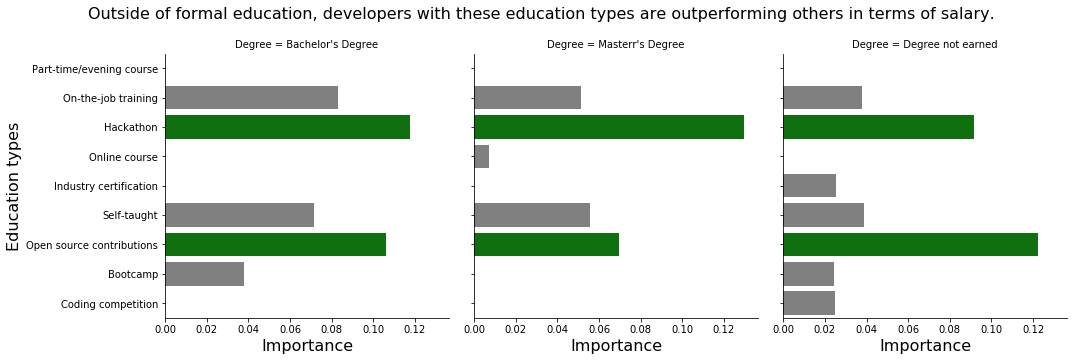

In [732]:
#custom palette
clrs = ['grey'] * 2 + ['green'] + ['grey'] * 3 + ['green'] + ['grey'] * 2 

g = sb.catplot(y = "EducationTypes", x = 'ModifiedImportance', col="Degree", col_wrap=3,
                data=df_weights,
                kind="bar", palette = clrs)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Outside of formal education, developers with these education types are outperforming others in terms of salary.',
         fontsize = 16)

# # Iterate thorugh each axis
# for ax in g.axes.flat:
#     ax.set_title(ax.get_title(), fontsize='xx-large')
#     # This only works for the left ylabels
#     ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
g.set_xlabels('Importance',fontsize = 16)
g.set_ylabels('Education types',fontsize = 16);

Here, the x-axis scale is coefficients of linear regression, and education types with zero importance are negative coefficient values. Since my emphasis is on which has the most impact on developer salary.


### Hackathon and Open source contributions
The most important education types for all kinds of formal education (bachelor's, master's, degree not earned). These are may not be the direct causation to the developer salary. But, these education types showcases' getting things done' skill which recruiters are looking for, more than any other education type.

### Industry certification and coding competetion
does not add more value to bachelor's and master's degree. But, for developers who have not earned degree has a possitive impact on their salaries

### Bootcamps
For developers with no degree and bachelor's degree bootcamps have possitive impact. But, for developers with master's degree does not add that much value.

### Random Analysis

In [598]:
#create a column for open source and hackathon
df_EducationTypes['openSource_Hackathon'] = df_EducationTypes[['Open source contributions','Hackathon']].apply(
    lambda x : 1 if (x[0] == 1 or x[1] == 1) else 0,axis = 1)

In [647]:
linear_model(df_EducationTypes,list(unique_EducationTypesList) + list(unique_DeveloperTypesList) + ['YearsCodedJob_num'],
             "Bachelor's degree")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     72.63
Date:                Sun, 29 Mar 2020   Prob (F-statistic):          1.25e-296
Time:                        19:49:59   Log-Likelihood:                -5568.3
No. Observations:                4445   AIC:                         1.119e+04
Df Residuals:                    4420   BIC:                         1.135e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

array([-0.10127337,  0.0831382 ,  0.11773546, -0.01923146, -0.02611109,
        0.07157448,  0.10595794,  0.03803046, -0.00489613,  0.00361956,
       -0.02722996, -0.05293025, -0.02818511, -0.02367977, -0.03424442,
       -0.05409185,  0.04089455, -0.01660201,  0.01957911,  0.00283698,
        0.00061741, -0.00599751,  0.04010798,  0.43559991])

In [626]:
linear_model(df_DeveloperTypes,list(unique_EducationTypesList) + list(unique_DeveloperTypesList) + ['YearsCodedJob_num'],
             "Some college/university study without earning a bachelor's degree")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     26.28
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           4.05e-95
Time:                        19:43:46   Log-Likelihood:                -1700.0
No. Observations:                1384   AIC:                             3450.
Df Residuals:                    1359   BIC:                             3581.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

array([-0.07454787,  0.03801787,  0.09163184, -0.03034874,  0.02549183,
        0.03853718,  0.12212885,  0.02427747,  0.02485597, -0.01543397,
        0.02522471, -0.02218268,  0.03562361, -0.06128077, -0.030095  ,
       -0.04312524,  0.03972253, -0.02584623,  0.05159852, -0.02653929,
       -0.03117582, -0.03495957,  0.06841663,  0.48465158])

In [588]:
for col in unique_EducationTypesList:
    print(col)
    print(df_EducationTypes[(df_EducationTypes[col] == 1) & (df_EducationTypes['Web developer'] == 1)]['YearsCodedJob'].describe())
    print('\n')

Part-time/evening course
count              879
unique              21
top       2 to 3 years
freq               104
Name: YearsCodedJob, dtype: object


On-the-job training
count             3216
unique              21
top       2 to 3 years
freq               375
Name: YearsCodedJob, dtype: object


Hackathon
count             1856
unique              21
top       3 to 4 years
freq               220
Name: YearsCodedJob, dtype: object


Online course
count             2997
unique              21
top       2 to 3 years
freq               357
Name: YearsCodedJob, dtype: object


Industry certification
count                 1115
unique                  21
top       20 or more years
freq                   113
Name: YearsCodedJob, dtype: object


Self-taught
count             6008
unique              21
top       2 to 3 years
freq               705
Name: YearsCodedJob, dtype: object


Open source contributions
count             2734
unique              21
top       3 to 4 years
freq       

In [589]:
for col in unique_EducationTypesList:
    print(col)
    print(df_EducationTypes[(df_EducationTypes[col] == 1) & (df_EducationTypes['Web developer'] == 1)]['YearsCodedJob_num'].describe())
    print('\n')

Part-time/evening course
count    883.000000
mean       7.420159
std        6.225826
min        0.000000
25%        2.000000
50%        5.000000
75%       11.000000
max       20.000000
Name: YearsCodedJob_num, dtype: float64


On-the-job training
count    3226.000000
mean        7.112833
std         5.891024
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        20.000000
Name: YearsCodedJob_num, dtype: float64


Hackathon
count    1863.000000
mean        6.504563
std         5.328002
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        20.000000
Name: YearsCodedJob_num, dtype: float64


Online course
count    3007.000000
mean        6.625208
std         5.670675
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        20.000000
Name: YearsCodedJob_num, dtype: float64


Industry certification
count    1117.000000
mean        9.180842
std         5.978866
min         0

In [184]:
SelfTaughtTypesList = []
df.SelfTaughtTypes.dropna().apply(lambda x : x.replace(';',',')).apply(lambda x : x.split(',')).apply(
    lambda x : SelfTaughtTypesList.extend(x))
set(SelfTaughtTypesList)

{' Built-in help',
 ' Company internal community',
 ' Friends network',
 ' Non-Stack online communities',
 ' Other',
 ' Stack Overflow Docs',
 ' Stack Overflow Q&A',
 ' Textbook',
 ' Trade book',
 ' Tutoring/mentoring',
 'Built-in help',
 'Company internal community',
 'Friends network',
 'Non-Stack online communities',
 'Official documentation',
 'Other',
 'Stack Overflow Docs',
 'Stack Overflow Q&A',
 'Textbook',
 'Trade book',
 'Tutoring/mentoring'}

Text(0.5, 1.0, 'Controlling the effect of education and experience, Which skills are more important in terms of salary?')

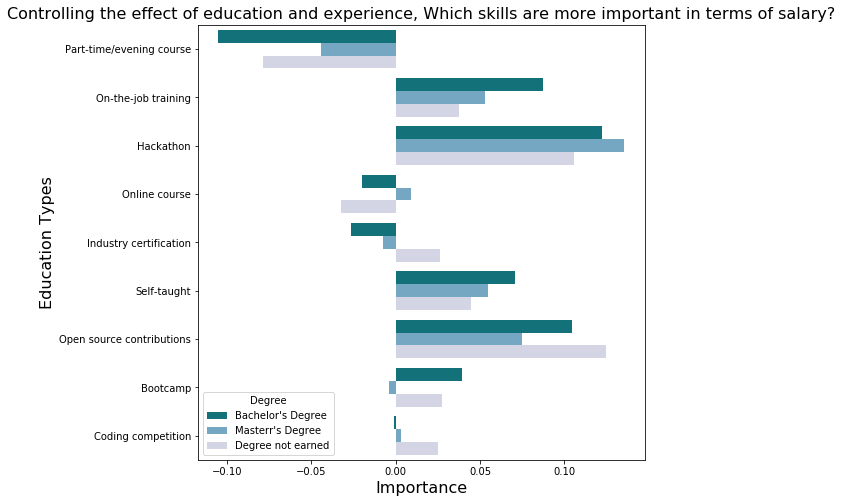

In [458]:
#plot bar chart
plt.figure(figsize = (8,8))
ax = sb.barplot(data = df_weights, y = 'EducationTypes', x = 'Importance',hue = 'Degree',palette = 'PuBuGn_r')
       
plt.ylabel('Education Types', fontsize = 16)
plt.xlabel('Importance', fontsize = 16)
plt.title('Controlling the effect of education and experience, Which skills are more important in terms of salary?',
         fontsize = 16)